<a href="https://colab.research.google.com/github/ammitrevska/DataScience/blob/main/Copy_of_Lab3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
import pandas as pd

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **average sea-level pressure** in the city of Skopje. Your task involves employing bagging and boosting methods to forecast the average sea-level pressure. To accomplish this, you will use data from the preceding three days, consisting of average, minimal, and maximal temperatures, precipitation, as well as wind direction and speed, and the current season. By applying these ensemble learning techniques, you aim to enhance the accuracy and reliability of your predictions, gaining valuable insights into the temporal dynamics of sea-level pressure based on the given meteorological variables.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Weather Dataset

## Downloading the Weather Dataset

In [ ]:
!gdown 1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI # Download the dataset.

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


## Exploring the Weather Dataset
This dataset consists of daily weather records for the city of Skopje from January 1, 2021, to August 1, 2023. Each entry includes a unique station ID, city name, date, corresponding season (e.g., summer, winter), and various meteorological parameters such as average, minimum, and maximum temperatures in Celsius, precipitation in millimeters, average wind direction in degrees, average wind speed in kilometers per hour, and average sea-level pressure in hectopascals. The dataset offers comprehensive insights into the climatic conditions, allowing for analysis and exploration of weather patterns in Skopje over the specified time period.

The dataset comprises the following columns:
- station_id - unique ID for the weather station,
- city_name - name of the city where the station is located,
- date - date of the weather record,
- season - season corresponding to the date (e.g., summer, winter),
- avg_temp_c - average temperature in Celsius,
- min_temp_c - minimum temperature in Celsius,
- max_temp_c - maximum temperature in Celsius,
- precipitation_mm - precipitation in millimeters,
- avg_wind_dir_deg - average wind direction in degrees,
- avg_wind_speed_kmh - average wind speed in kilometers per hour, and
- avg_sea_level_pres_hpa - average sea-level pressure in hectopascals.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/weather (1).csv')

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.
df.head(12)

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5
5,13588,Skopje,2021-01-06,Winter,6.2,2.6,11.0,0.0,18.0,6.7,1017.2
6,13588,Skopje,2021-01-07,Winter,7.3,4.1,9.3,0.5,0.0,4.5,1015.2
7,13588,Skopje,2021-01-08,Winter,5.7,4.2,8.1,7.9,346.0,6.5,1009.7
8,13588,Skopje,2021-01-09,Winter,2.9,1.5,5.4,8.1,300.0,5.9,1016.8
9,13588,Skopje,2021-01-10,Winter,2.2,1.3,3.1,6.1,354.0,4.7,1017.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station_id              943 non-null    int64  
 1   city_name               943 non-null    object 
 2   date                    943 non-null    object 
 3   season                  943 non-null    object 
 4   avg_temp_c              943 non-null    float64
 5   min_temp_c              943 non-null    float64
 6   max_temp_c              943 non-null    float64
 7   precipitation_mm        943 non-null    float64
 8   avg_wind_dir_deg        943 non-null    float64
 9   avg_wind_speed_kmh      943 non-null    float64
 10  avg_sea_level_pres_hpa  943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 81.2+ KB


In [ ]:
df.columns

Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa'],
      dtype='object')

In [ ]:
df = df.drop(columns=['station_id', 'city_name'])

Remove the highly correlated features.

<ipython-input-164-17c454583998>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.3f',linewidths=2)


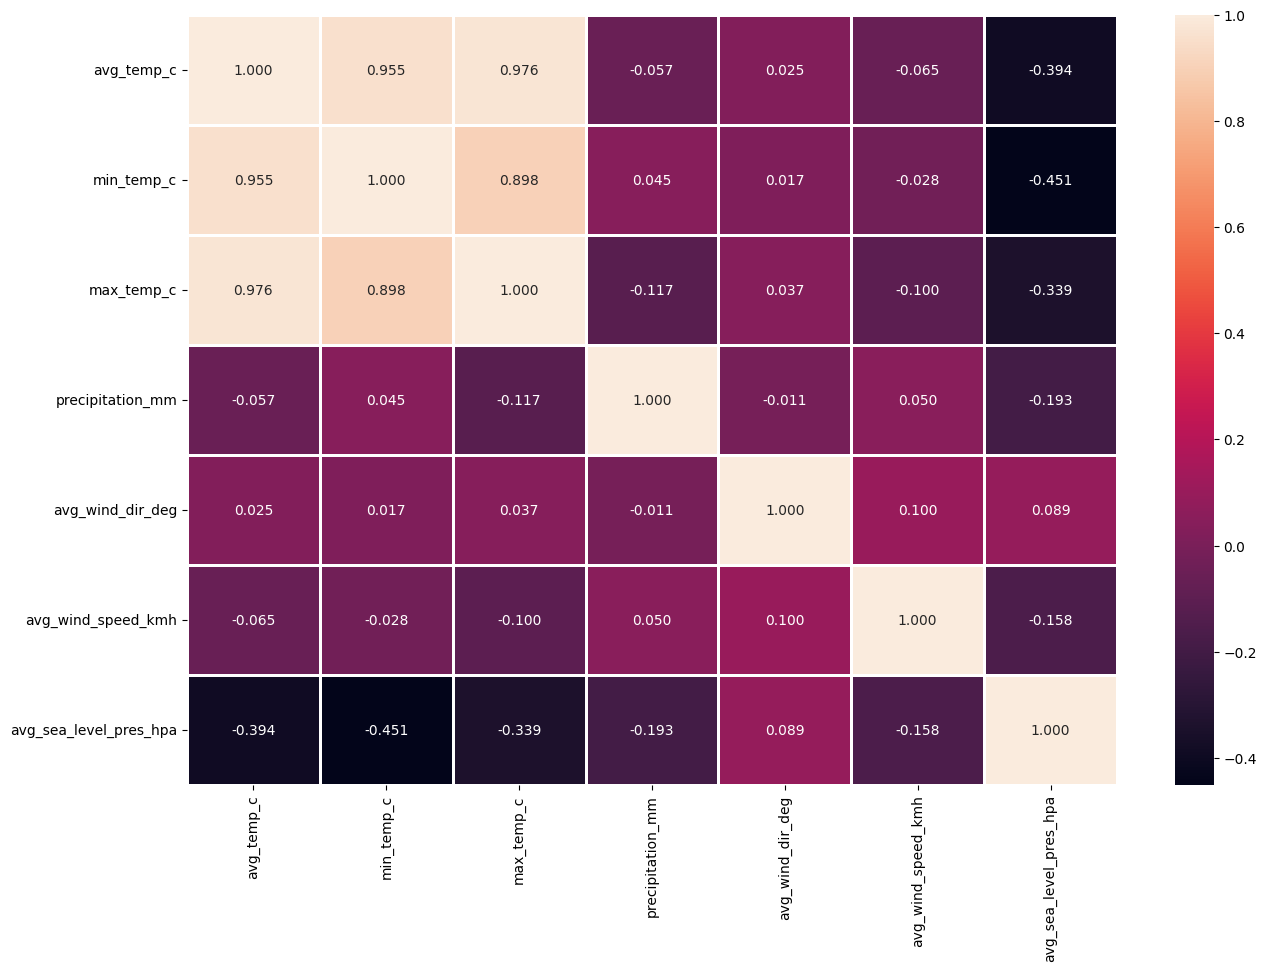

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.3f',linewidths=2)
plt.show()

In [ ]:
df = df.drop(columns=['min_temp_c', 'max_temp_c'])

In [ ]:
# Write your code here. Add as many boxes as you need.
df.head()

,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,2021-01-01,Winter,5.1,0.0,330.0,5.9,1021.2
1,2021-01-02,Winter,3.0,0.0,330.0,5.9,1021.2
2,2021-01-03,Winter,6.8,1.3,339.0,8.0,1017.8
3,2021-01-04,Winter,6.6,3.6,298.0,5.3,1011.3
4,2021-01-05,Winter,4.3,4.6,11.0,5.1,1014.5


Encode the categorical features.

In [ ]:
# Write your code here. Add as many boxes as you need.
df.season.value_counts()

Spring    276
Summer    246
Winter    239
Autumn    182
Name: season, dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder


In [ ]:
cat_columns = ['date', 'season']


In [ ]:
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,0,3,5.1,0.0,330.0,5.9,1021.2
1,1,3,3.0,0.0,330.0,5.9,1021.2
2,2,3,6.8,1.3,339.0,8.0,1017.8
3,3,3,6.6,3.6,298.0,5.3,1011.3
4,4,3,4.3,4.6,11.0,5.1,1014.5


**Convert Date to Datetime Format:**
Use a library like pandas or datetime to parse and convert the object-type dates into datetime objects.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,1970-01-01 00:00:00.000000000,3,5.1,0.0,330.0,5.9,1021.2
1,1970-01-01 00:00:00.000000001,3,3.0,0.0,330.0,5.9,1021.2
2,1970-01-01 00:00:00.000000002,3,6.8,1.3,339.0,8.0,1017.8
3,1970-01-01 00:00:00.000000003,3,6.6,3.6,298.0,5.3,1011.3
4,1970-01-01 00:00:00.000000004,3,4.3,4.6,11.0,5.1,1014.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    943 non-null    datetime64[ns]
 1   season                  943 non-null    int64         
 2   avg_temp_c              943 non-null    float64       
 3   precipitation_mm        943 non-null    float64       
 4   avg_wind_dir_deg        943 non-null    float64       
 5   avg_wind_speed_kmh      943 non-null    float64       
 6   avg_sea_level_pres_hpa  943 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 51.7 KB


# Feauture Extraction
Select the relevant features for prediction and apply a lag of one, two, and three days to each chosen feature (except `season`), creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
columns = ['avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']

In [ ]:
# Write your code here. Add as many boxes as you need.
for col in columns:
  for i in range(1, 4):
    df[f'{col}lag{i}'] = df[col].shift(i)


**df[f'{col}lag{i}']** dynamically creates a new column name by concatenating the original column name (col) with the string "lag" and the current lag value (i). This creates columns like avg_temp_c_lag1, min_temp_c_lag2, etc.F represents f-string, When prefixed with f, Python evaluates the expressions within the placeholders and replaces them with their respective values.

**df[col].shift(i)** shifts the values of the current column (col) down by i rows, effectively creating a lagged version of the data representing values from previous days.


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa,avg_temp_clag1,avg_temp_clag2,avg_temp_clag3,...,precipitation_mmlag3,avg_wind_dir_deglag1,avg_wind_dir_deglag2,avg_wind_dir_deglag3,avg_wind_speed_kmhlag1,avg_wind_speed_kmhlag2,avg_wind_speed_kmhlag3,avg_sea_level_pres_hpalag1,avg_sea_level_pres_hpalag2,avg_sea_level_pres_hpalag3
3,1970-01-01 00:00:00.000000003,3,6.6,3.6,298.0,5.3,1011.3,6.8,3.0,5.1,...,0.0,339.0,330.0,330.0,8.0,5.9,5.9,1017.8,1021.2,1021.2
4,1970-01-01 00:00:00.000000004,3,4.3,4.6,11.0,5.1,1014.5,6.6,6.8,3.0,...,0.0,298.0,339.0,330.0,5.3,8.0,5.9,1011.3,1017.8,1021.2
5,1970-01-01 00:00:00.000000005,3,6.2,0.0,18.0,6.7,1017.2,4.3,6.6,6.8,...,1.3,11.0,298.0,339.0,5.1,5.3,8.0,1014.5,1011.3,1017.8
6,1970-01-01 00:00:00.000000006,3,7.3,0.5,0.0,4.5,1015.2,6.2,4.3,6.6,...,3.6,18.0,11.0,298.0,6.7,5.1,5.3,1017.2,1014.5,1011.3
7,1970-01-01 00:00:00.000000007,3,5.7,7.9,346.0,6.5,1009.7,7.3,6.2,4.3,...,4.6,0.0,18.0,11.0,4.5,6.7,5.1,1015.2,1017.2,1014.5


In [ ]:
df.isnull().sum()

date                          0
season                        0
avg_temp_c                    0
precipitation_mm              0
avg_wind_dir_deg              0
avg_wind_speed_kmh            0
avg_sea_level_pres_hpa        0
avg_temp_clag1                0
avg_temp_clag2                0
avg_temp_clag3                0
precipitation_mmlag1          0
precipitation_mmlag2          0
precipitation_mmlag3          0
avg_wind_dir_deglag1          0
avg_wind_dir_deglag2          0
avg_wind_dir_deglag3          0
avg_wind_speed_kmhlag1        0
avg_wind_speed_kmhlag2        0
avg_wind_speed_kmhlag3        0
avg_sea_level_pres_hpalag1    0
avg_sea_level_pres_hpalag2    0
avg_sea_level_pres_hpalag3    0
dtype: int64

In [ ]:
df.drop(columns = ['date','season','avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh'], inplace=True)

In [ ]:
df.columns

Index(['avg_sea_level_pres_hpa', 'avg_temp_clag1', 'avg_temp_clag2',
       'avg_temp_clag3', 'precipitation_mmlag1', 'precipitation_mmlag2',
       'precipitation_mmlag3', 'avg_wind_dir_deglag1', 'avg_wind_dir_deglag2',
       'avg_wind_dir_deglag3', 'avg_wind_speed_kmhlag1',
       'avg_wind_speed_kmhlag2', 'avg_wind_speed_kmhlag3',
       'avg_sea_level_pres_hpalag1', 'avg_sea_level_pres_hpalag2',
       'avg_sea_level_pres_hpalag3'],
      dtype='object')

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('avg_sea_level_pres_hpa', axis=1)
Y = df['avg_sea_level_pres_hpa']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
print(rf.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 3 to 942
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_sea_level_pres_hpa      940 non-null    float64
 1   avg_temp_clag1              940 non-null    float64
 2   avg_temp_clag2              940 non-null    float64
 3   avg_temp_clag3              940 non-null    float64
 4   precipitation_mmlag1        940 non-null    float64
 5   precipitation_mmlag2        940 non-null    float64
 6   precipitation_mmlag3        940 non-null    float64
 7   avg_wind_dir_deglag1        940 non-null    float64
 8   avg_wind_dir_deglag2        940 non-null    float64
 9   avg_wind_dir_deglag3        940 non-null    float64
 10  avg_wind_speed_kmhlag1      940 non-null    float64
 11  avg_wind_speed_kmhlag2      940 non-null    float64
 12  avg_wind_speed_kmhlag3      940 non-null    float64
 13  avg_sea_level_pres_hpalag1  940 non

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_pred = rf.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(r2_score(Y_test, y_pred))
print(mean_squared_error(Y_test, y_pred))


0.7131679874195797
12.646109590425386


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

xgb = XGBRegressor()


In [ ]:
print(xgb.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_pred = xgb.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
print(r2_score(Y_test, y_pred))
print(mean_squared_error(Y_test, y_pred))


0.6774434985881517
14.221163214181905


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.